# Regresión lineal con Lasso (6x³ + 1 = 0)

In [40]:
import pandas as pd

csv_path = './data/rl3.csv'
df = pd.read_csv(csv_path)
df.head()

,x,y
0,24,82945
1,35,257251
2,36,279937
3,36,279937
4,42,444529


### Añadimos columnas

In [41]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

df["x2"] = df.x ** 2
df["x3"] = df.x ** 3
df.head(10)

,x,y,x2,x3
0,24,82945,576,13824
1,35,257251,1225,42875
2,36,279937,1296,46656
3,36,279937,1296,46656
4,42,444529,1764,74088
5,63,1500283,3969,250047
6,79,2958235,6241,493039
7,87,3951019,7569,658503
8,88,4088833,7744,681472
9,92,4672129,8464,778688


In [42]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y test
train, test = train_test_split(df, test_size=0.33)

X_train = train.drop('y', axis=1)
y_train = train.y
X_test = test.drop('y', axis=1)
y_test = test.y

### Configuración del modelo

In [43]:
from sklearn. linear_model import LinearRegression

model = LinearRegression()

# Ajuste del modelo
model.fit(X_train , y_train)

# Imprimir los coeficientes y la intersección
print("Coeficientes (pesos/importancia de cada característica):", model.coef_)
print("Intersección (valor de la variable dependiente cuando todas las características son cero):", model.intercept_)

print("\ny = ax3 + bx2 + cx + d")
print(f'a = {model.coef_[0]:.20f}')
print(f'b = {model.coef_[1]:.20f}')
print(f'c = {model.coef_[2]:.20f}')
print(f'd = {model.intercept_:.20f}')

Coeficientes (pesos/importancia de cada característica): [-6.51088268e-10 -2.33324471e-12  6.00000000e+00]
Intersección (valor de la variable dependiente cuando todas las características son cero): 1.0000000298023224

y = ax3 + bx2 + cx + d
a = -0.00000000065108826755
b = -0.00000000000233324471
c = 6.00000000000000976996
d = 1.00000002980232238770


### Predicción y métricas

In [44]:
from sklearn import metrics

# Métricas sobre el rendimiento del modelo

y_pred = model.predict(X_test)

# MSE: medida de cuánto se desvían las predicciones del modelo de los valores reales en el conjunto de prueba.
print ("MSE:", metrics.mean_squared_error(y_pred , y_test)) 

# R^2: medida de cuánto se ajustan las predicciones del modelo a los valores reales en el conjunto de prueba.
# R^2 = 1 indica un ajuste perfecto
# R^2 = 0 indica que el modelo no es mejor que el modelo que siempre predice la media de la variable dependiente
print ("R^2:", metrics.r2_score(y_pred , y_test))

MSE: 5.877925857621276e-15
R^2: 1.0


### Visualización

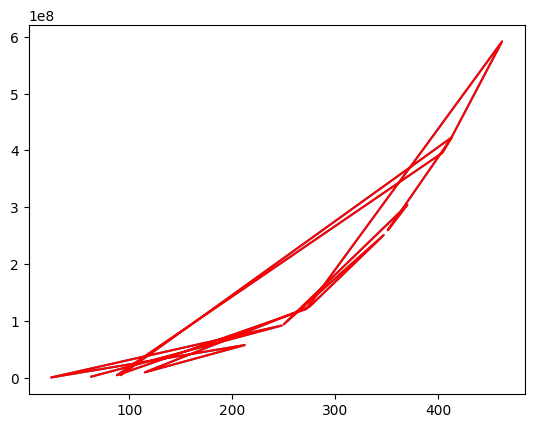

In [45]:
import matplotlib.pyplot as plt

plt.plot(X_test['x'], y_test)
plt.plot(X_test['x'], y_pred, color = "red")

### Lasso

In [46]:
from sklearn.linear_model import Lasso
regr_lasso = Lasso(alpha = .3)
regr_lasso.fit( X_train , y_train)
y_pred = regr_lasso.predict(X_test)
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MSE: 955865854739.7828
R^2: 0.9999706202447971


In [47]:
print ("Coeff and intercept:", regr_lasso.coef_ , regr_lasso.intercept_)
coef = regr_lasso.coef_
independet_term = regr_lasso.intercept_
print("y = ax3 + bx2 + cx + d")
print('a =','{:.20f}'.format(coef[0]))
print('b =','{:.20f}'.format(coef[1]))
print('c =','{:.20f}'.format(coef[2]))
print('d =','{:.20f}'.format(independet_term))

Coeff and intercept: [-8.43234898e+04  3.76802375e+02  5.53766295e+00] 3972278.388555169
y = ax3 + bx2 + cx + d
a = -84323.48980349164048675448
b = 376.80237470567800528443
c = 5.53766295164039235033
d = 3972278.38855516910552978516


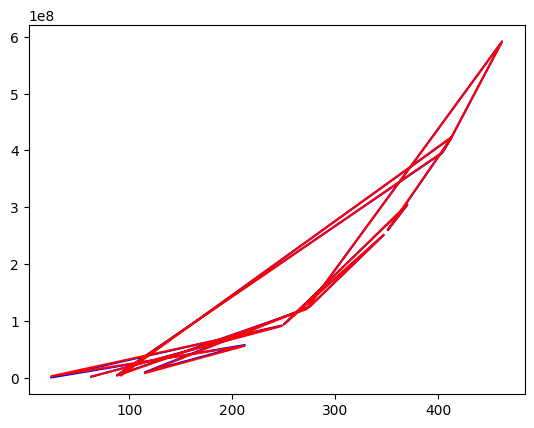

In [48]:
import matplotlib.pyplot as plt

plt.plot(X_test['x'], y_test, color = "blue")
plt.plot(X_test['x'], y_pred, color = "red")